### **GRIPOCT21 - THE SPARKS FOUNDATION**
### **TASK-1: PREDICTION USING SUPERVISED ML**

To predict the percentage of an student based on the number of study hours and to find the predicted score if a student studies for 9.25hrs/day

### **DONE BY: AKANSHA SANTHARAM**
### **ROLE: DATA SCIENCE AND BUSINESS ANALYTICS**


In this Simple Linear Regression task we will be predicting the percentage of marks that a student is expected to score based upon the number of hours they studied. 

In [ ]:
# Importing all libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### **IMPORTING DATASET**

In [ ]:
# Reading data from remote link
dataset = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Print first 10 datasets
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
print(dataset.size)
print(dataset.shape)
print(dataset.ndim)

50
(25, 2)
2


In [ ]:
# Check for null values
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Check for non null values
dataset.count().sum()

50

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Shows the total number of rows and columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **DATA VISUALIZATION**

In [ ]:
# Shows how the two columns are correlated with each other
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


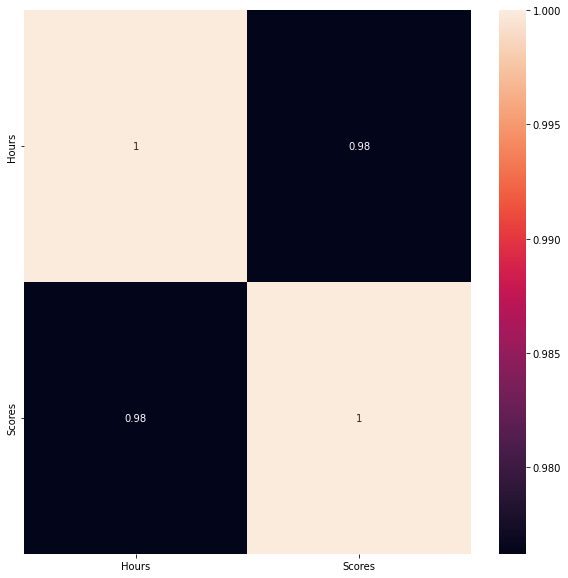

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(dataset.corr(),annot=True)

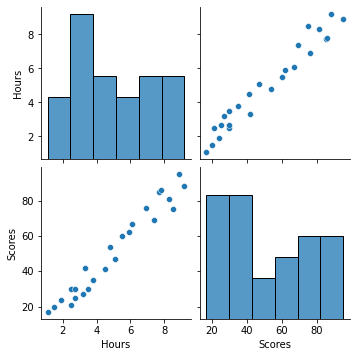

In [ ]:
sb.pairplot(dataset)

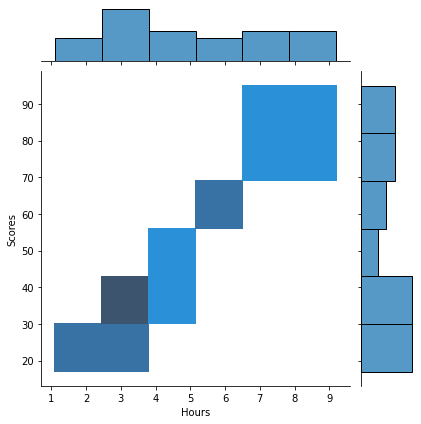

In [ ]:
sb.jointplot(x='Hours',y='Scores',data=dataset,kind='hist')

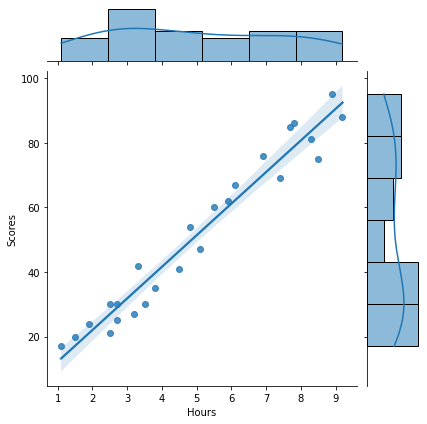

In [ ]:
sb.jointplot(x='Hours',y='Scores',data=dataset,kind='reg')

Text(0, 0.5, 'Percentage Score')

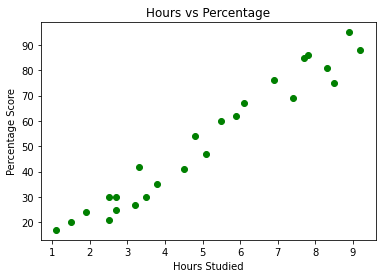

In [ ]:
# Plotting the distribution of scores
plt.scatter(data=dataset,x='Hours', y='Scores',color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **PREPARING THE DATA**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values  

In [ ]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### **SPLITTING THE DATASET INTO TRAIN AND TEST SET**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [ ]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [ ]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [ ]:
print(y_test)

[20 27 69 30 62]


### **TRAINING THE MODEL**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **VISUALIZING THE TRAIN SET RESULT**

Text(0, 0.5, 'Percentage Score')

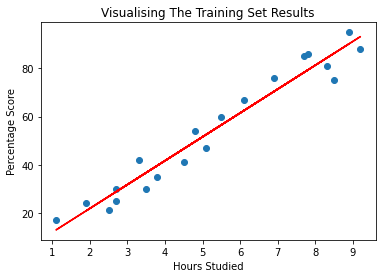

In [ ]:
# Plotting the regression line
# Plotting for the train data
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train),color='red')
plt.title('Visualising The Training Set Results')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

### **VISUALISING THE TEST SET RESULT**

Text(0, 0.5, 'Percentage Score')

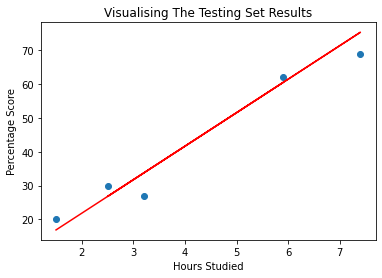

In [ ]:
# Plotting the regression line
# Plotting for the testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test),color='red')
plt.title('Visualising The Testing Set Results')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

### **VISUALISING THE DATASET RESULT**

Text(0, 0.5, 'Percentage Score')

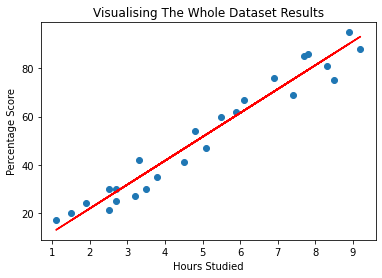

In [ ]:
# Plotting the regression line
# Plotting for the whole data
plt.scatter(X, y)
plt.plot(X, lr.predict(X),color='red')
plt.title('Visualising The Whole Dataset Results')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [ ]:
print('Training Score:', lr.score(X_train,y_train))
print('Test Score:', lr.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


### **MAKING PREDICTIONS**

In [ ]:
# Predicted result 
y_pred=lr.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
# Actual result
print(y_test)

[20 27 69 30 62]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
hours=[[9.25]]
own_pred = lr.predict(hours)
print(f"No of Hours= {hours[0][0]}")
print("Predicted Score= {}".format(own_pred[0]))

No of Hours= 9.25
Predicted Score= 93.69173248737539


### **EVALUATING THE MODEL**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('R-2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error:  21.598769307217456
R-2: 0.9454906892105354
